<a href="https://colab.research.google.com/github/mollah2022/Neural-Network/blob/main/knowledgeLab14.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [37]:
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt


In [50]:

extra_data = [
    ("rachel", "frozen", 5),
    ("tom", "gravity", 6),
    ("uma", "coco", 9),
    ("victor", "avengers", 4),
    ("will", "titanic", 7),
]


In [51]:

movies = list({m for _, m, _ in extra_data})

extra_data_expanded = []
for person, _, rating in extra_data:
    for movie in movies:
        extra_data_expanded.append((person, movie, rating))


In [52]:
df = pd.DataFrame(extra_data_expanded, columns=["person", "movie", "rating"])

B = nx.Graph()
B.add_nodes_from(df["person"], bipartite=0)
B.add_nodes_from(df["movie"], bipartite=1)

for _, row in df.iterrows():
    B.add_edge(row["person"], row["movie"], weight=row["rating"])


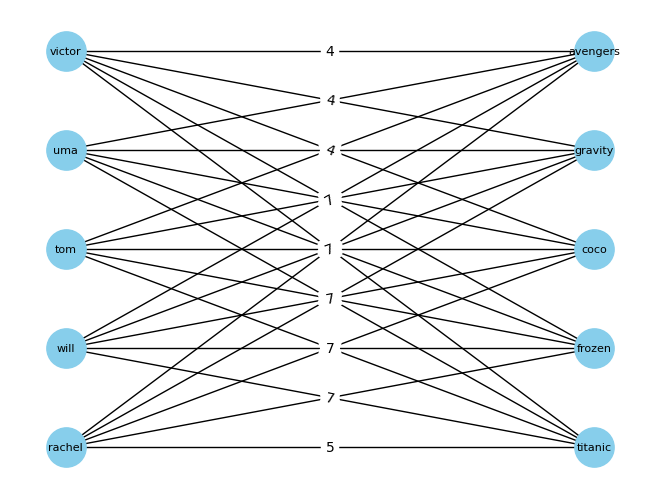

In [53]:
pos = nx.bipartite_layout(B, df["person"])
nx.draw(B, pos, with_labels=True, node_color="skyblue", node_size=800, font_size=8)
labels = nx.get_edge_attributes(B, "weight")
nx.draw_networkx_edge_labels(B, pos, edge_labels=labels)
plt.show()